In [1]:
!pip install pandas==1.0.5
!pip install seaborn
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib 패키지 한글 폰트 설정 시작
#!apt-get update -qq
#!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
fontprop = fm.FontProperties(fname=path)


In [2]:
k_data = json.load(open("./KOK-VQA.json"))
k_df = pd.DataFrame(k_data["annotations"])

In [3]:
k_df["questions"]

0    [{'question_id': '1-1', 'question_ko': '사진속 어떤...
1    [{'question_id': '2-1', 'question_ko': '사진속 어떤...
2    [{'question_id': '1-1', 'question_ko': '이미지의 어...
Name: questions, dtype: object

In [4]:
k_kb = json.load(open("./KOK-VQA-KB.json"))
kb_df = pd.DataFrame(k_kb["knowledgebase"])

In [5]:
kb_df.T

,KB,e1_label,e2_label,surface_ko,surface_en,sources,r,context,dataset,e1,e2
ko.dbpedia/1137,ko.dbpedia,피아노,피아노,"[피아노, 이름, 피아노]",None,None,http://dbpedia.org/ontology/title,None,None,http://ko.dbpedia.org/resource/피아노,피아노
ko.dbpedia/1142,ko.dbpedia,피아노,바르톨로메오,"[피아노, 발명가, 크리스토포리]",None,None,http://dbpedia.org/ontology/abstract,None,None,http://ko.dbpedia.org/resource/피아노,None
ko.dbpedia/1437,ko.dbpedia,탁구,탁구라켓,"[탁구, 장비, 탁구라켓]",None,None,http://dbpedia.org/ontology/equipment,None,None,http://ko.dbpedia.org/resource/탁구,http://ko.dbpedia.org/resource/탁구라켓
conceptnet/1,conceptnet,piano,very popular musical instrument,"[피아노, 이다, 매우 인기있는 악기]",None,None,/r/IsA,None,/d/conceptnet/4/en,/c/en/piano/r,/c/en/very_popular_musical_instrument
conceptnet/2,conceptnet,piano,music store,"[피아노, 위치하다, 음반 가게]",None,None,/r/AtLocation,None,/d/conceptnet/4/en,/c/en/piano/r,/c/en/music_store


## 3. one-cycle EDA check

In [6]:
k_one = json.load(open("./one_cycle_samples.json"))
k_df_one = pd.DataFrame(k_one["annotations"])

In [7]:
k_df_one.head(2)

,IMAGE_ID,IMAGE_NAME,ACTION,CAPTION,IMAGE_ACQUISITION_DATE,IMAGE_URL,LICENSE,MAINOBJECT,MAINOBJECT_URL,SCENE,SUBOBJECT_1,SUBOBJECT_2,WIDTH,HEIGHT,WIKI_FILE,bounding_box,questions
0,120100120220622135110,120100120220622135110.jpg,Lie,바닥에 돌이 있다.,20200929,https://upload.wikimedia.org/wikipedia/commons...,FREE,개미,http://ko.dbpedia.org/resource/개미,forest - broadleaf,자갈,헛소리,800,600,1932Ants of the Philippines eating Alimango 33...,"[{'BOX_ID': '629421', 'OBJECT': '개미', 'X_COORD...","[{'question_id': '120100120220622135110-1', 'q..."
1,110500120220627131757,110500120220627131757.jpg,Lie,창문 밖에 나무들이 많이 있다.,20090531,https://upload.wikimedia.org/wikipedia/commons...,FREE,창_(건축),http://ko.dbpedia.org/resource/창_(건축),house,유리 바구니,오리,576,768,Window's.jpg,"[{'BOX_ID': '629403', 'OBJECT': '창_(건축)', 'X_C...","[{'question_id': '110500120220627131757-1', 'q..."


In [8]:
k_df_one.columns

Index(['IMAGE_ID ', 'IMAGE_NAME ', 'ACTION ', 'CAPTION ',
       'IMAGE_ACQUISITION_DATE', 'IMAGE_URL ', 'LICENSE ', 'MAINOBJECT ',
       'MAINOBJECT_URL ', 'SCENE ', 'SUBOBJECT_1 ', 'SUBOBJECT_2 ', 'WIDTH ',
       'HEIGHT ', 'WIKI_FILE ', 'bounding_box', 'questions'],
      dtype='object')

### 3-1. preprocessing

In [9]:
k_df_one["question1"] = k_df_one["questions"].apply(lambda x: x[0]["question_ko"])
k_df_one["question2"] = k_df_one["questions"].apply(lambda x: x[1]["question_ko"])

k_df_one["answer1"] = k_df_one["questions"].apply(lambda x: x[0]["answer_ko"])
k_df_one["answer2"] = k_df_one["questions"].apply(lambda x: x[1]["answer_ko"])

k_df_one["fact1"] = k_df_one["questions"].apply(lambda x: x[0]["fact"][0])
k_df_one["fact2"] = k_df_one["questions"].apply(lambda x: x[1]["fact"][0])

k_df_one["bbox"] = k_df_one["bounding_box"].apply(lambda x: x[0]["OBJECT"])

del(k_df_one["questions"])
del(k_df_one["bounding_box"])


In [10]:
k_df_one.head(10)

,IMAGE_ID,IMAGE_NAME,ACTION,CAPTION,IMAGE_ACQUISITION_DATE,IMAGE_URL,LICENSE,MAINOBJECT,MAINOBJECT_URL,SCENE,...,WIDTH,HEIGHT,WIKI_FILE,question1,question2,answer1,answer2,fact1,fact2,bbox
0,120100120220622135110,120100120220622135110.jpg,Lie,바닥에 돌이 있다.,20200929,https://upload.wikimedia.org/wikipedia/commons...,FREE,개미,http://ko.dbpedia.org/resource/개미,forest - broadleaf,...,800,600,1932Ants of the Philippines eating Alimango 33...,이미지 속 공생하는 곤충은 무엇일까,이미지 속 게 딱지에 올라가 있는 개미는 몇 마리니,개미,8,ko.dbpedia/197,ko.dbpedia/197,개미
1,110500120220627131757,110500120220627131757.jpg,Lie,창문 밖에 나무들이 많이 있다.,20090531,https://upload.wikimedia.org/wikipedia/commons...,FREE,창_(건축),http://ko.dbpedia.org/resource/창_(건축),house,...,576,768,Window's.jpg,이미지 속 네모난 건축물은 뭐야,창은 몇 개야,창,1,ko.dbpedia/189,ko.dbpedia/189,창_(건축)
2,110101820220621113002,110101820220621113002.jpg,Lie,키보드가 놓여있다.,20130302,https://upload.wikimedia.org/wikipedia/commons...,FREE,키보드_(악기),http://ko.dbpedia.org/resource/키보드_(악기),music studio,...,1024,683,Steinberg CC121 Cubase control surface and M-A...,다리나 기둥으로 받쳐 만든 가구는 무엇일까,흰색과 검정색 건반으로 이루어져 있는 악기는 무엇일까,탁자,키보드,ko.dbpedia/827,ko.dbpedia/827,키보드_(악기)
3,110500320220622150258,110500320220622150258.jpg,Lie,장애인 화장실 문 앞에 창살이 있다.,20120117,https://upload.wikimedia.org/wikipedia/commons...,FREE,화장실,http://ko.dbpedia.org/resource/화장실,lavatory,...,1280,673,Public toilet - Haikou 01.jpg,전 세계 인구 중 화장실이 없는 사람은 몇 퍼센트야,이미지 속 화장실 문 중에 닫혀 있는 문은 몇 개야,40,2,ko.dbpedia/191,ko.dbpedia/191,화장실
4,110200920220621145512,110200920220621145512.jpg,Lie,케이크에 양초가 있다.,20050528,https://upload.wikimedia.org/wikipedia/commons...,FREE,케이크,http://ko.dbpedia.org/resource/케이크,dinette - home,...,792,600,Birthday Cake2.jpg,이미지 속 후식으로 먹는 프랑스 요리는 무엇이니,이미지 속 케이크에 꽂혀있는 것은 뭐니,케이크,초,ko.dbpedia/149,ko.dbpedia/149,케이크
5,120100220220622152103,120100220220622152103.jpg,Sit,벌이 꽃잎 위에 앉아있고 옆에 벌레가 있다.,20170706,https://upload.wikimedia.org/wikipedia/commons...,FREE,벌_(곤충),http://ko.dbpedia.org/resource/벌_(곤충),field - wild,...,800,600,PKLHmyz20824 (20).jpg,벌의 목은 뭐야,이미지 속 벌은 몇 마리니,벌목,1,ko.dbpedia/228,ko.dbpedia/228,벌_(곤충)
6,110101720220620180934,110101720220620180934.jpg,Play a musical instrument,사람이 바이올린을 연주하고 있다.,20110110,https://upload.wikimedia.org/wikipedia/commons...,FREE,바이올린,http://ko.dbpedia.org/resource/바이올린,stage - indoor,...,640,795,Student-loan-violin (5342880285).jpg,바이올린과 대등할 만큼 인기가 많은 악기는 무엇이니,이미지 속 연주자의 악기는 무엇일까,피아노,바이올린,ko.dbpedia/15,ko.dbpedia/15,바이올린
7,110100120220620135251,110100120220620135251.jpg,Play a musical instrument,무대 위에서 남자가 아코디언을 연주하며 노래를 부르고 있다.,20150731,https://upload.wikimedia.org/wikipedia/commons...,FREE,아코디언,http://ko.dbpedia.org/resource/아코디언,stage - indoor,...,1024,544,Garish Heimatsound Festival 2015 (32).jpg,아코디언의 음역은 무엇에 따라 다르니,아코디언은 몇 명이 들고 있어,배치,1,ko.dbpedia/66,ko.dbpedia/66,아코디언
8,110101220220621102819,110101220220621102819.jpg,Lie,악기들이 놓여져 있다.,20140803,https://upload.wikimedia.org/wikipedia/commons...,FREE,오보에,http://ko.dbpedia.org/resource/오보에,museum - indoor,...,682,1023,"Drum and ken saranai (oboe), Cham - Vietnam Mu...",이미지 속 타악기는 뭘까,이미지 속 오보에는 몇 개니,드럼 세트,1,ko.dbpedia/10,ko.dbpedia/10,오보에
9,110400220220621150208,110400220220621150208.jpg,Lie,신호등이 빨간불이다.,20200226,https://upload.wikimedia.org/wikipedia/commons...,FREE,소화전,http://ko.dbpedia.org/resource/소화전,street,...,1024,623,WY capitol night2.jpg,소방 설비는 무엇을 진압하는 데 사용할까,이미지 속 소화전은 몇 가지 색으로 이루어져 있니,화재,2,ko.dbpedia/178,ko.dbpedia/178,소화전


In [11]:
eda_list = []
for colum in k_df_one.columns:
    if colum not in ["question1","question2","answer1","answer2", "fact1", "fact2"]:
        num_unique = len(k_df_one[colum].unique())
        unique_ratio = num_unique/len(k_df_one)
        eda_list.append([colum, num_unique, unique_ratio])
        #print(colum, len(k_df_one[colum].unique()), )

num_unique = len(pd.concat([ k_df_one["question1"], k_df_one["question2"] ]).unique())
unique_ratio = (num_unique/(len(k_df_one)*2)) * 100
eda_list.append(["questions", num_unique, unique_ratio])

num_unique = len(pd.concat([ k_df_one["answer1"], k_df_one["answer2"] ]).unique())
unique_ratio = (num_unique/(len(k_df_one)*2)) * 100
eda_list.append(["answers", num_unique, unique_ratio])

num_unique = len(pd.concat([ k_df_one["fact1"], k_df_one["fact2"] ]).unique())
unique_ratio = (num_unique/(len(k_df_one)*2)) * 100
eda_list.append(["facts", num_unique, unique_ratio])


In [12]:
df_eda = pd.DataFrame(eda_list)
df_eda.columns = ["colum_name", "num_unique", "unique_ratio"]

In [13]:
df_eda

,colum_name,num_unique,unique_ratio
0,IMAGE_ID,610,1.000000
1,IMAGE_NAME,610,1.000000
2,ACTION,25,0.040984
3,CAPTION,546,0.895082
4,IMAGE_ACQUISITION_DATE,475,0.778689
5,IMAGE_URL,610,1.000000
6,LICENSE,1,0.001639
7,MAINOBJECT,32,0.052459
8,MAINOBJECT_URL,32,0.052459
9,SCENE,87,0.142623


In [25]:
len(k_df_one[k_df_one["fact1"] == k_df_one["fact2"]])

import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib 패키지 한글 폰트 설정 시작
#!apt-get update -qq
#!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
#path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
#font_name = fm.FontProperties(fname=path).get_name()


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
plt.rc('font', family=font_name)


NanumGothic Eco


/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core

/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aailab_conda/anaconda3/envs/kbvqa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyp

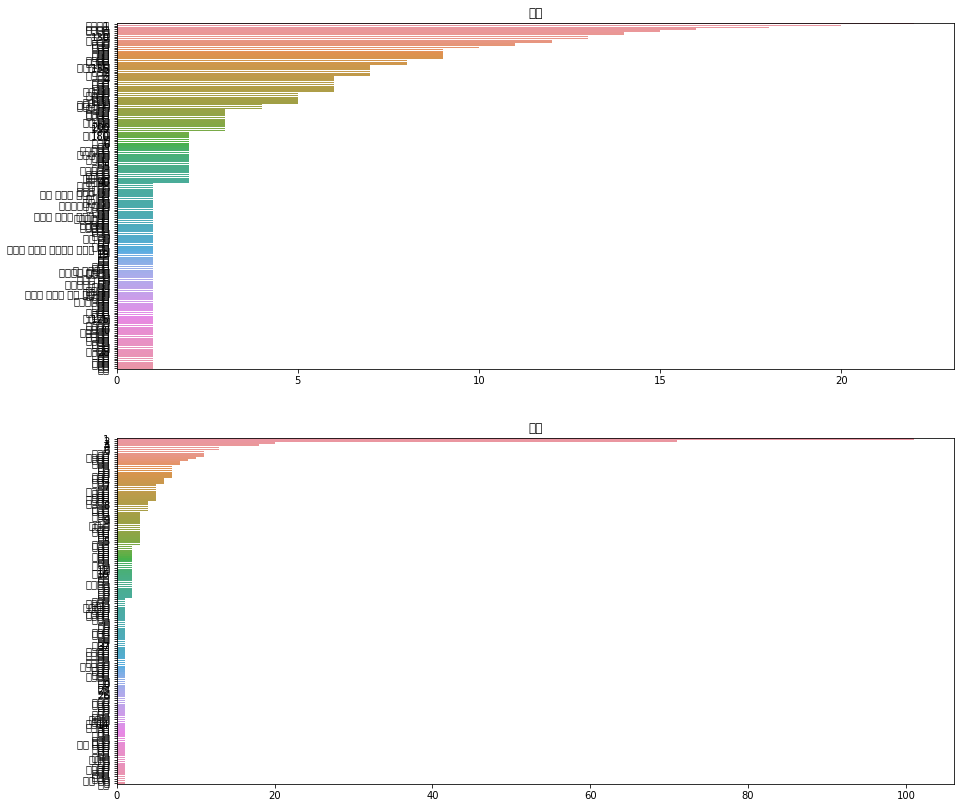

In [26]:
plot_list = ['ACTION ', 'CAPTION ',
       'IMAGE_ACQUISITION_DATE', 'LICENSE ', 'MAINOBJECT ',
       'MAINOBJECT_URL ', 'SCENE ', 'SUBOBJECT_1 ', 'SUBOBJECT_2 ', 'WIDTH ',
       'HEIGHT ', 'question1', 'question2', 'answer1', 'answer2',
       'fact1', 'fact2', 'bbox']

plot_list = ['answer1', 'answer2']

plot_num = len(plot_list)
fig, axes = plt.subplots(plot_num, 1, figsize=(15, 7*plot_num))

for idx, colum in enumerate(plot_list):

    tmp = k_df_one[colum].value_counts()
    tmp = pd.DataFrame(k_df_one[colum].value_counts())
    x = tmp[colum].to_numpy()
    y = tmp.index.to_numpy()

    sns.barplot(x,y, ax=axes[idx])
    axes[idx].set_title(colum)